# Regression Models

Modeling the M•–σ relation (mass of the supermassive black hole in the center of a galaxy vs. the velocity dispersion of the stars in the bulge of those same galaxies).

Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

Data read of the CSV archive M_sigma:

In [2]:
Msigma = pd.read_csv("M_sigma.csv", delimiter = ",")

### Part 1: Ordinary Linear Regression

#### Data separation into different columns:

In [3]:
logSigma = Msigma['logSigma']
err_logSigma = Msigma['err_logSigma']
logM = Msigma['logM']
err_logM = Msigma['err_logM']
Type = Msigma['Type']

#### Data separation into train and test sampling sets:

In [4]:
# Import the Train Test Split:
from sklearn.model_selection import train_test_split

In [5]:
# Fixing the seed, so the values stay the same:
np.random.seed(40)
train, test = train_test_split(Msigma)

In [6]:
# Train sampling set:
train_logSigma = train.logSigma.values.reshape(-1,1)
train_logM = train.logM.values.reshape(-1,1)
train_err_logSigma = train.err_logSigma.values
train_err_logM = train.err_logM.values

# Test sampling set:
test_logSigma = test.logSigma.values.reshape(-1,1)
test_logM = test.logM.values.reshape(-1,1)
test_err_logSigma = test.err_logSigma.values
test_err_logM = test.err_logM.values

Plot of the data and its respective errors:

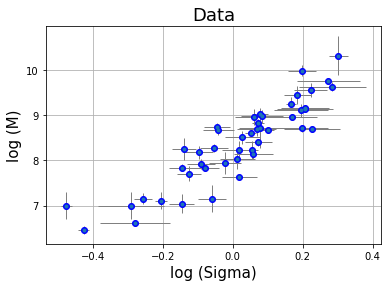

In [7]:
plt.plot(logSigma, logM, 'bo')
plt.errorbar(x = logSigma, y = logM, yerr = err_logM, xerr = err_logSigma, fmt = '.', ecolor = 'gray', lw=1)
plt.title("Data", size=18)
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.grid()
plt.show()

#### Linear Regression:

In [8]:
# Import the Linear Model:
from sklearn import linear_model

# Linear Regression object:
linear = linear_model.LinearRegression()

# Apply the object to the training sets to try the model:
linear.fit(train_logSigma, train_logM,sample_weight = train_err_logM)

LinearRegression()

Plot of the data and the Linear Regression:

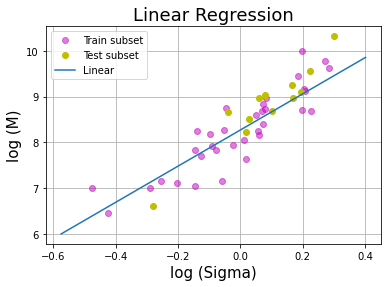

In [9]:
# Plot of the training sets and the linear regression:
plt.plot(train.logSigma, train.logM, 'mo', alpha=0.5, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')

# Use the linear model for making predictions about the model:
logSigma_to_plot = np.linspace(min(logSigma) - 0.1, max(logSigma) + 0.1, 100)
plt.plot(logSigma_to_plot, linear.predict(logSigma_to_plot.reshape(-1,1)), label='Linear')

plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.title('Linear Regression', size=18)
plt.grid()
plt.legend()
plt.show()

#### Polynomial Regression:

Determine the degree of the Polynomial Regression

In [10]:
# Import the other functions of sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Set an arrange of degrees, whoose maximum value is 8:

degrees = np.arange(1, 9, 1)

# Set empty arranges to put the values of the RMS of the data sets and the coeficients of the polynomial regressions:
rms_train = []
rms_test = []
coeficients = []

# Iterative algorythm for finding the coeficients of each degree of polynomial regression:
for degree in degrees:
    
    # Polynomial model
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                  ('linear', linear_model.LinearRegression())])
    
    # Train the model using the training sets
    model = model.fit(train_logSigma,train_logM,linear__sample_weight = train_err_logM)
    
    # The polynomial coefficients
    coeficients.append(model.named_steps['linear'].coef_)
    
    # Mean Squared Error (MSE) 
    rmstrain = mean_squared_error(train_logM, model.predict(train_logSigma))
    rmstest = mean_squared_error(test_logM, model.predict(test_logSigma))

    rms_train.append(rmstrain)
    rms_test.append(rmstest)

Plot of the RMS of the polynomial models with different degrees fitted to the training data and the Cross Validation:

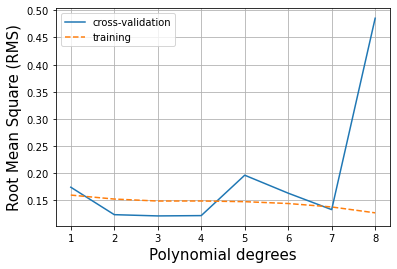

In [11]:
plt.plot(degrees, rms_test, label = "cross-validation")
plt.plot(degrees, rms_train, "--", label = "training")
plt.grid()
plt.xlabel("Polynomial degrees", size=15)
plt.ylabel("Root Mean Square (RMS)", size=15)
plt.legend()
plt.show()

Zoom of the previous plot for degrees from 1 to 4:

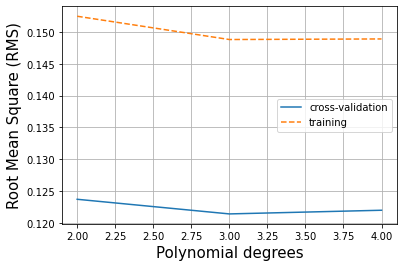

In [12]:
plt.plot(degrees[1:4], rms_test[1:4], label = "cross-validation")
plt.plot(degrees[1:4], rms_train[1:4], "--", label = "training")
plt.grid()
plt.xlabel("Polynomial degrees", size=15)
plt.ylabel("Root Mean Square (RMS)", size=15)
plt.legend()
plt.show()

We can see in the previous graph that the MSE from the training data sample is decreasing as the polynomial degree of the model increases.

On the other side, we can see that for the cross validation, the relation between the MSE and the polynomial degrees is variable, beacause for polynomial degrees in the range from 1 to 4, the MSE decreases, the same with degrees from 4 to 5, but for degrees from 5 to 7 and for 4 to 5 and from 7 to 8, the MSE increases as the degree also increases.

We can observe in the cross validation that the lower point in RMS of the polynomial degrees is the value of three, so that means the polynomial model with that degree is the best to model to fit our data, beacuse it has less error. That´s why the value of polynomial degree 3 is choosen.

In [13]:
# Polynomial model using the best value of degree found
polynomial = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', linear_model.LinearRegression())])

polynomial = polynomial.fit(train_logSigma, train_logM, linear__sample_weight = train_err_logM)

In [14]:
# Values of the coeficients 
model.named_steps['linear'].coef_

array([[ 0.00000000e+00,  4.00177482e+00,  6.81642132e+01,
         3.00328445e+02, -1.83977786e+03, -1.00176195e+04,
         5.81198604e+03,  7.96125351e+04,  9.13768912e+04]])

Plot of the data and the Polynomial Regression of degree three:

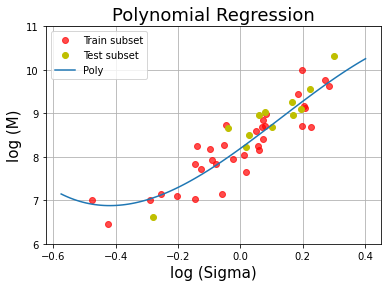

In [15]:
plt.plot(train.logSigma, train.logM, 'ro', alpha=0.7, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')

logSigma_to_plot = np.linspace(min(logSigma) - 0.1, max(logSigma) + 0.1, 100)
plt.plot(logSigma_to_plot, polynomial.predict(logSigma_to_plot.reshape(-1,1)), label='Poly')
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.ylim(6,11)
plt.title('Polynomial Regression', size=18)
plt.grid()
plt.legend()
plt.show()

### Part 2: Ridge and Lasso Regression

Ridge Regression:

In [16]:
# Ridge CV Model
ridgecv = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgecv.fit(train_logSigma, train_logM, sample_weight= train_err_logM)

# Optimal value of the parameter alpha
ridgecv.alpha_

0.01

In [17]:
# Ridge Regression Model
ridge = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', linear_model.Ridge(alpha=0.01))])
ridge = ridge.fit(train_logSigma, train_logM, linear__sample_weight= train_err_logM)

In [18]:
# Values of the coeficients 
ridge.named_steps['linear'].coef_

array([[ 0.        ,  4.09415752,  1.57462781, -0.47221014]])

Plot of the data and the Ridge Regression with the parameter alpha of 0.01:

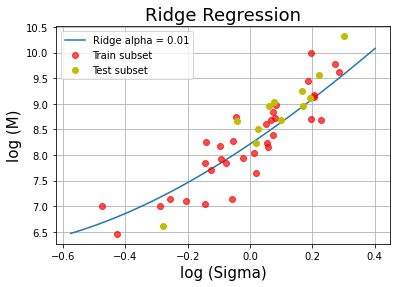

In [19]:
plt.plot(logSigma_to_plot, ridge.predict(logSigma_to_plot.reshape(-1,1)), label='Ridge alpha = 0.01')
plt.plot(train.logSigma, train.logM, 'ro', alpha=0.7, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.grid()
plt.title('Ridge Regression', size=18)
plt.legend()
plt.show()

Lasso Regression:

In [20]:
lasso = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', linear_model.Lasso(alpha=0.01))])
lasso = lasso.fit(train_logSigma, train_logM, linear__sample_weight= train_err_logM)

In [21]:
# Values of the coeficients
lasso.named_steps['linear'].coef_

array([ 0.        ,  3.65775189,  0.        , -0.        ])

Plot of the data and the Lasso Regression:

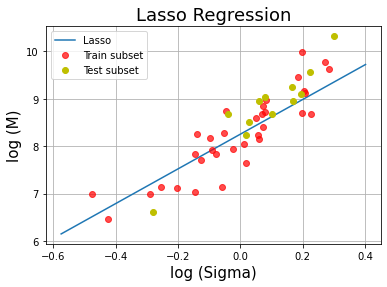

In [22]:
plt.plot(logSigma_to_plot, lasso.predict(logSigma_to_plot.reshape(-1,1)), label='Lasso')
plt.plot(train.logSigma, train.logM, 'ro', alpha=0.7, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.grid()
plt.title('Lasso Regression', size=18)
plt.legend()
plt.show()

Possible Differences:

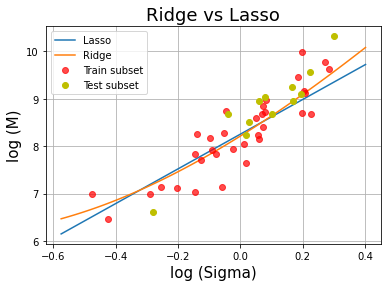

In [23]:
plt.plot(logSigma_to_plot, lasso.predict(logSigma_to_plot.reshape(-1,1)), label='Lasso')
plt.plot(logSigma_to_plot, ridge.predict(logSigma_to_plot.reshape(-1,1)), label='Ridge')
plt.plot(train.logSigma, train.logM, 'ro', alpha=0.7, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.grid()
plt.title('Ridge vs Lasso', size=18)
plt.legend()
plt.show()

### Part 3: Huber Loss Regression

In this case, its is important to use a Huber Loss Regression model to fit the training data, because this method, is very robust regression and practically ignores the oultliers of the data (it is less sensitve to the outliers than the other models), so they are not taken into account when fitting the curve in the training sample, and that makes the model more accurate when fitting the data points in the graph.

In Huber Loss Regression, the hyper-parameter is called delta δ which is as a measure of spread of the points we trust (inliers: the points that are not outliers), so it is important to set the hyper-parameter in an appropiate value. For that, there are two methods to do it: the first is to use the Cross-Validation to find the optimal hyper-parameter or the second is setting it to the value of 1.35 with the supose that the inliers are standard Gaussian and an efficiency of 95% is achieved. For this case, the value of δ = 1.35 has been choosen.

In [24]:
# Huber Loss Regression Model
from sklearn.linear_model import HuberRegressor

huberloss = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', linear_model.HuberRegressor(epsilon=1.35, max_iter=100))])
huberloss = huberloss.fit(train_logSigma, train_logM.ravel(), linear__sample_weight= train_err_logM)

In [25]:
# Values of the coeficients
huberloss.named_steps['linear'].coef_

array([ 4.07182397,  5.33823587,  2.0906888 , -7.54480527])

Plot of the data and the Huber Loss Regression:

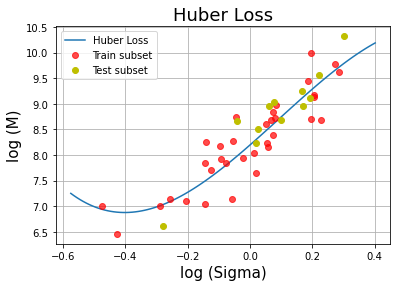

In [26]:
plt.plot(logSigma_to_plot, huberloss.predict(logSigma_to_plot.reshape(-1,1)), label='Huber Loss')
plt.plot(train.logSigma, train.logM, 'ro', alpha=0.7, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')
plt.grid()
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.title('Huber Loss', size=18)
plt.legend()
plt.show()

Comparison of all the regression models:

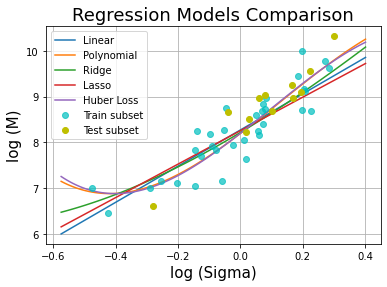

In [27]:
plt.plot(logSigma_to_plot, linear.predict(logSigma_to_plot.reshape(-1,1)), label='Linear')
plt.plot(logSigma_to_plot, polynomial.predict(logSigma_to_plot.reshape(-1,1)), label='Polynomial')
plt.plot(logSigma_to_plot, ridge.predict(logSigma_to_plot.reshape(-1,1)), label='Ridge')
plt.plot(logSigma_to_plot, lasso.predict(logSigma_to_plot.reshape(-1,1)), label='Lasso')
plt.plot(logSigma_to_plot, huberloss.predict(logSigma_to_plot.reshape(-1,1)), label='Huber Loss')
plt.plot(train.logSigma, train.logM, 'co', alpha=0.7, label = 'Train subset')
plt.plot(test.logSigma, test.logM, 'yo', label = 'Test subset')
plt.grid()
plt.xlabel("log (Sigma)", size=15)
plt.ylabel("log (M)", size=15)
plt.title('Regression Models Comparison', size=18)
plt.legend()
plt.show()

MSE Error:

In [28]:
# MSE of all the regression models
elitrain = mean_squared_error(train_logM, linear.predict(train_logSigma))
elitest = mean_squared_error(test_logM, linear.predict(test_logSigma))

eptrain = mean_squared_error(train_logM, polynomial.predict(train_logSigma))
eptest = mean_squared_error(test_logM, polynomial.predict(test_logSigma))

ertrain = mean_squared_error(train_logM, ridge.predict(train_logSigma))
ertest = mean_squared_error(test_logM, ridge.predict(test_logSigma))

eltrain = mean_squared_error(train_logM, lasso.predict(train_logSigma))
eltest = mean_squared_error(test_logM, lasso.predict(test_logSigma))

ehtrain = mean_squared_error(train_logM, huberloss.predict(train_logSigma))
ehtest = mean_squared_error(test_logM, huberloss.predict(test_logSigma))

In [29]:
# MSE Cross-Validation:
print('MSE Cross-Validation')
print('Linear: {:.3f}'.format(elitest))
print('Polynomial: {:.3f}'.format(eptest))
print('Ridge: {:.3f}'.format(ertest))
print('Lasso: {:.3f}'.format(eltest))
print('Huber Loss: {:.3f}'.format(ehtest))

MSE Cross-Validation
Linear: 0.174
Polynomial: 0.121
Ridge: 0.170
Lasso: 0.215
Huber Loss: 0.119


We can see from the previous graph and from the values of MSE that the Huber Loss Regression Model is the most accurate for fitting the sample, because it models almost all the points and it has the lowest value of error (MSE).